<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/analisis_diario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pandas_datareader import data
from pylab import *

In [51]:
btc=data.DataReader("BTCUSD","av-daily","2021-01-01","2021-11-15",api_key="000W9HI05KWAWA7B")["close"]

In [6]:
eth=data.DataReader("ETHUSD","av-daily","2021-01-01","2021-11-15",api_key="000W9HI05KWAWA7B")["close"]

In [7]:
eur=data.DataReader("EURUSD","av-daily","2021-01-01","2021-11-15",api_key="000W9HI05KWAWA7B")["close"]

In [2]:
eur=data.DataReader("EURUSD","av-intraday","2021-01-01","2021-11-17",api_key="000W9HI05KWAWA7B")

In [3]:
data=eur[["close"]]

In [4]:
temporalidades=[]
for x in range(1,24):
  temporalidades.append(data.iloc[-60*x:])

In [5]:
horas_maximos=[]
for x in temporalidades:
  horas_maximos.append(x.idxmax().close) 

In [6]:
horas_minimos=[]
for x in temporalidades:
  horas_minimos.append(x.idxmin().close) 

In [7]:
precios_minimos=[]
for x in temporalidades:
  precios_minimos.append(x.min())

In [8]:
precios_maximos=[]
for x in temporalidades:
  precios_maximos.append(x.max())

In [9]:
data

,close
2021-11-15 08:37:00,1.1443
2021-11-15 08:38:00,1.1444
2021-11-15 08:39:00,1.1444
2021-11-15 08:40:00,1.1442
2021-11-15 08:41:00,1.1444
...,...
2021-11-16 08:31:00,1.1365
2021-11-16 08:32:00,1.1362
2021-11-16 08:33:00,1.1360
2021-11-16 08:34:00,1.1363


In [32]:
data.iloc[-1].close

1.1365

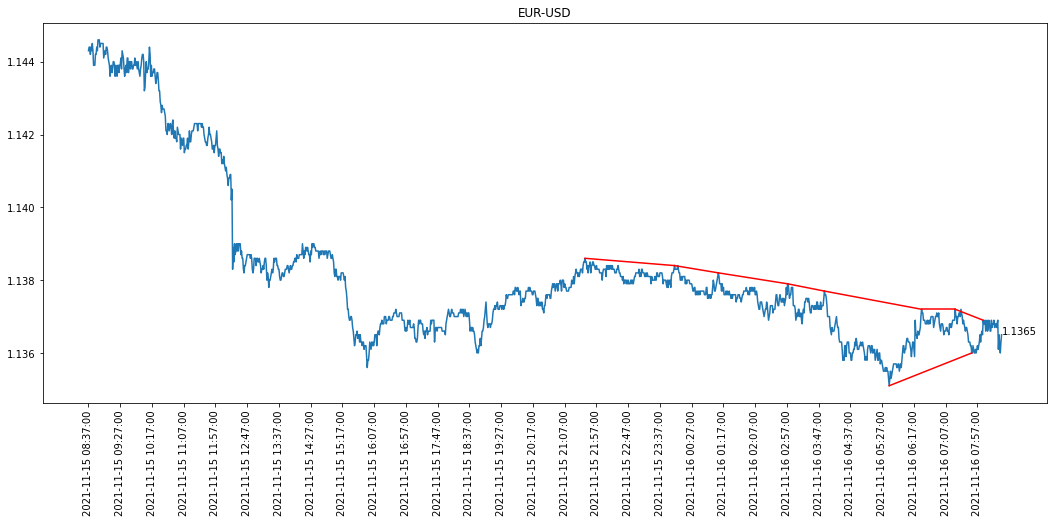

In [33]:
figure(figsize=(18,7))
plot(data)

custom_tick=data.index[::50]
xticks((custom_tick),rotation=90)
title("EUR-USD")
text(data.index[-1],data.iloc[-1].close,data.iloc[-1].close)


for i in range(0,11):
  plot([horas_maximos[i],horas_maximos[i+1]],[precios_maximos[i],precios_maximos[i+1]],color="r")
  plot([horas_minimos[i],horas_minimos[i+1]],[precios_minimos[i],precios_minimos[i+1]],color="r")